<div style="float:right;padding-top:20px">
   <img src="https://www.enib.fr/images/logo-enib-accueil.jpg" style="width:120px"/>
</div>

# Rauch Low Pass Filter

<div style="padding-top: 40px">
<div class="alert alert-info" role="alert" >
    <ul>
        <li><b>Contributor:</b> Ewan Carrée</li>
        <li><b>LT spice file: </b><a href="./asc/Rauch_LP.asc">Download</a></li>
     </ul>
</div>
</div>

In [40]:
#commande permettant l'interaction dans les zone de graphes directement dans le navigateur. A PLACER EN 1e LIGNE
%matplotlib notebook
#bibliotheque definissant tous les opérations de calcul
from numpy import *
#librairie avec les fonctions permetttant l'affichage
from matplotlib.pyplot import * 
#bibliotheque emarquant les fonctions permettant l'étude des systemes linéaires.
import scipy.signal as sig 
from custom_lib import show
from math import sqrt
from math import pi

## Electronic Circuit

<img src="./img/Rauch_LP.svg" width="300px">

The circuit transfer function is given by (see [proof](#proof)) :
    $$T(p)=\frac{\frac{-R2}{R1}}{C1C2R2R3 p^2+ \frac{C2R2R3+C2R1R3+R1R2C2}{R1} p+ 1}$$

## Parameter Identification

The function `compute_parameters` evaluates the filter parameters from the filter components.

In [41]:
def compute_parameters(R1,R2,R3,C1,C2):
    # compute your parameter here
    w0 = 1/sqrt(C2*C1*R2*R3)
    f0 = w0/(2*pi)
    m = (C2*R2*R3+C2*R1*R3+R1*R2*C2)/(2*R1*sqrt(C2*C1*R2*R3))
    T0 = -R2/R1
    Tw0 = (-R2)/(sqrt(C2*C1*R2*R3)*C2*(R2*R3+R1*R3+R1*R2)) #totalement incohérent
    return {"w0":w0,"f0":f0,"m":m,"T0":T0,"Tw0":Tw0}

In [42]:
R1, R2, R3, C1, C2 = 1000, 5000, 2000, 3.5*(10**-6), 2.3*(10**-8)

parameters = compute_parameters(R1,R2,R3,C1,C2)
show(parameters,name = "parameter")

HTML(value="<table class='table' style='margin-top: 10px'><tr><th scope='col' style='width: 20%'>Parameter</th…

## Component Selection

The function `compute_component` compute the filter components from some filter specification.

In [43]:
def compute_component(f0,m,T0):
    # compute your component here
    # nous somme obligés de fixer 2 des 5 composants pour résoudre le reste
    R1= 1000
    R3 = 2000
    R2 = -T0*R1
    C2 = (2*R1*m)/(2*pi*f0*(R2*R3+R1*R3+R1*R2))
    C1 = 1/(((2*pi*f0)**2)*C2*R2*R3)
    
    return {"R1":R1,"R2":R2,"R3":R3,"C1":C1,"C2":C2}

In [44]:
f0, m, T0 = 177.38, 0.217, -5

components = compute_component(f0,m,T0)
show(components,name = "component")

HTML(value="<table class='table' style='margin-top: 10px'><tr><th scope='col' style='width: 20%'>Component</th…

## Demonstration
<a id='proof'></a>

On fait un potentiel des noeuds en A :
$$\frac{ve-va}{R1} +\frac{vs-va}{R2} +\frac{0-va}{Zc1}+ \frac{0-va}{R3}$$
$$ va = \frac {Zc1R3(R2ve+R1vs)}{R2R3Zc1+R1R3Zc1+R1R2R3+R1R2Zc1}$$

On résout de manière classique le reste :
$$vs = \frac {-Zc2va}{R3}$$
  $$ = \frac{-Zc2}{R3}*\frac {Zc1R3(R2ve+R1vs)}{R2R3Zc1+R1R3Zc1+R1R2R3+R1R2Zc1}$$
  $$ = \frac{-1}{C2C2p^2}*\frac {R2ve+R1vs}{\frac{R2R3}{C1p} +\frac{R1R3}{C1p}+\frac{R1R2}{C1p}+R1R2R3}$$
  $$ = \frac{-R2ve-R1vs}{C2R2R3p+C2R1R3p+C2R1R2+C2C1R1R2R3p^2}$$
  $$ = \frac{-R2ve}{R1+C2R2R3p+C2R1R3p+C2R1R2+C2C1R1R2R3p^2}$$
  
On met sous forme canonique en factorisant par R1 :
$$ T = \frac{\frac{-R2}{R1}}{1+p(\frac{C2R2R3+C2R1R3+R1R2C2}{R1})+p^2(C2C1R2R3)}$$


La forme canonique est du type : $$T(p) =\frac {b0}{1 + \frac{2mp}{w0} + \frac {p^2}{w0^2}}$$


On en déduit :

la pulsation propre du système : $$w0^2 = \frac{1}{C2C1R2R3}$$
                                 $$w0 = \frac{1}{sqrt(C2C1R2R3)}$$

le coefficient d'amortissement : $$\frac{2*m}{w0} = \frac{C2R2R3+C2R1R3+R1R2C2}{R1}$$
                                 $$m = \frac{C2R2R3+C2R1R3+R1R2C2}{2R1*sqrt(C2C1R2R3)}$$

<IPython.core.display.Javascript object>


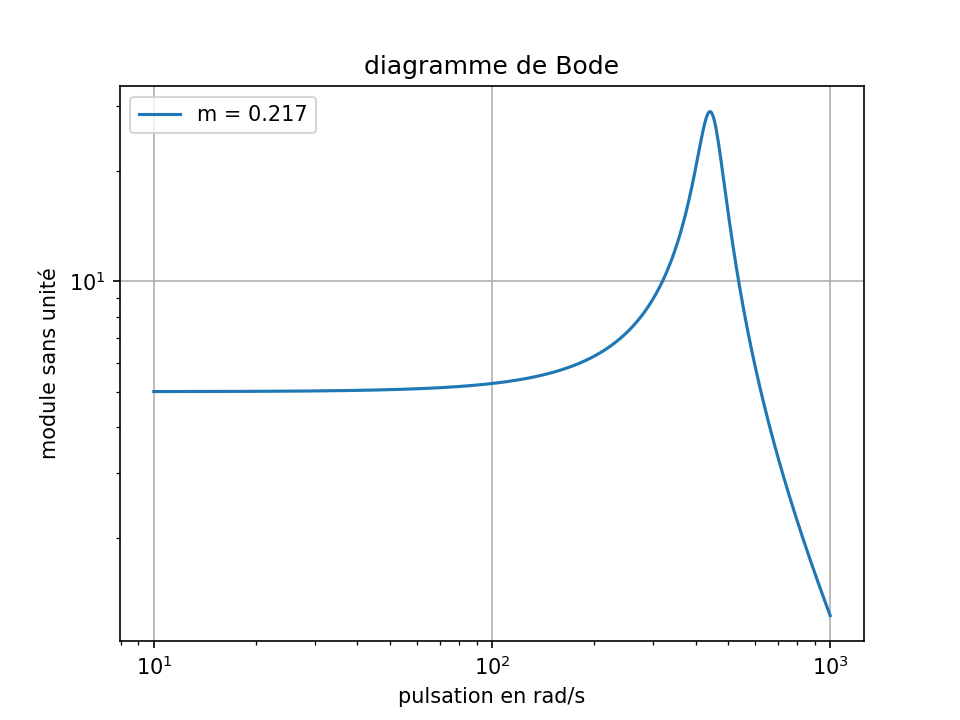

In [45]:
den = [1/(2*pi*f0**2),2*m/(2*pi*f0), 1] #coef du polynome dans l'ordre decroissant des puissance (de jw) JUSQUA 0
num = [0,0,T0]
TLP = sig.lti(num,den) #generation du systeme linéaire correspondant à cette fonctionde transfert
[w,T]=TLP.freqresp() #calcul de Tcomplexe pour toutes les pulsations
mod=abs(T) #definition du module
arg=180*angle(T)/pi #definition de l'argument en degrés
figure(1)
loglog(w,mod,label = "m = "+str(m)) #trace sur echelles log log avec legende correspondante à la trace calculée 
    
figure(1)
ylabel("module sans unité")
xlabel("pulsation en rad/s")
title("diagramme de Bode")
legend()
grid()

<IPython.core.display.Javascript object>


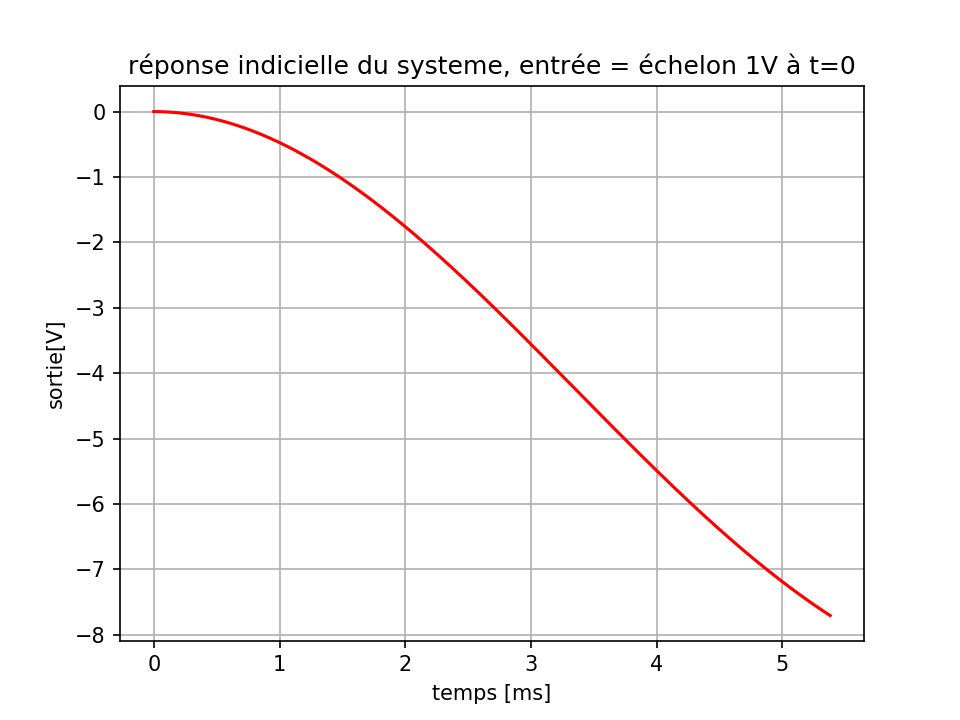

Text(0.5, 1.0, 'réponse indicielle du systeme, entrée = échelon 1V à t=0')

In [46]:
Te = 0.00001 #periode d'echantillonage des calculs
Tau = 1/(2*pi*f0) #constante de temps du systeme
t = np.arange(0, 6*Tau, Te) #definition des instants où seront calculés les signaux

[ta, rep_ind] = TLP.step(T=t) #calcul de la réponse indicielle pour tous les points definis.Sortie sous forme d'un tableau de coordonnées 
figure(2)
plot(t*1000, rep_ind, color="red", label ="s(t)") #affichage de la trace avec axe en ms
xlabel('temps [ms]')
ylabel('sortie[V]')
grid(which='both', axis='both')
title("réponse indicielle du systeme, entrée = échelon 1V à t=0")